# Multiple Centrality Assessment

Multiple Centrality Assessment (MCA) is an approach to street network analysis developed by Porta and Latora (2006). Its main aim is to understand the structure of the street networks of our cities from the perspective of the importance and position of each street/intersection within the whole network as expressed by various centralities. Momepy can do all types of MCA-based centrality analysis as were developed through the years.

The aim of this notebook is to illustrate how to measure different centralities using momepy. For the theoretical background, please refer to the work of Porta et al.


In [ ]:
pip install momepy


In [7]:
pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 kB 2.2 MB/s eta 0:00:00


In [14]:
pip install mapclassify

In [8]:
import geopandas as gpd
import momepy
import osmnx as ox
import matplotlib.pyplot as plt

We can use osmnx to dowload network from OSM. In this case we will work with Madrid

In [9]:
streets_graph = ox.graph_from_place('Madrid, Spain', network_type='drive')
streets_graph = ox.projection.project_graph(streets_graph)

The code above dowloaded the network from OSM and projected it. At this point, `streets_graph` is networkX Graph object, similar to the one we will use in momepy. In theory, you can use it directly. However, when converting a GeoDataFrame to a network using momepy ensures that all attributes are set and compatible with morphometric functions, so we recommend saving an undirected graph to a gdf and letting momepy do the conversion back to the graph.

In [10]:
edges = ox.graph_to_gdfs(ox.get_undirected(streets_graph), nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)

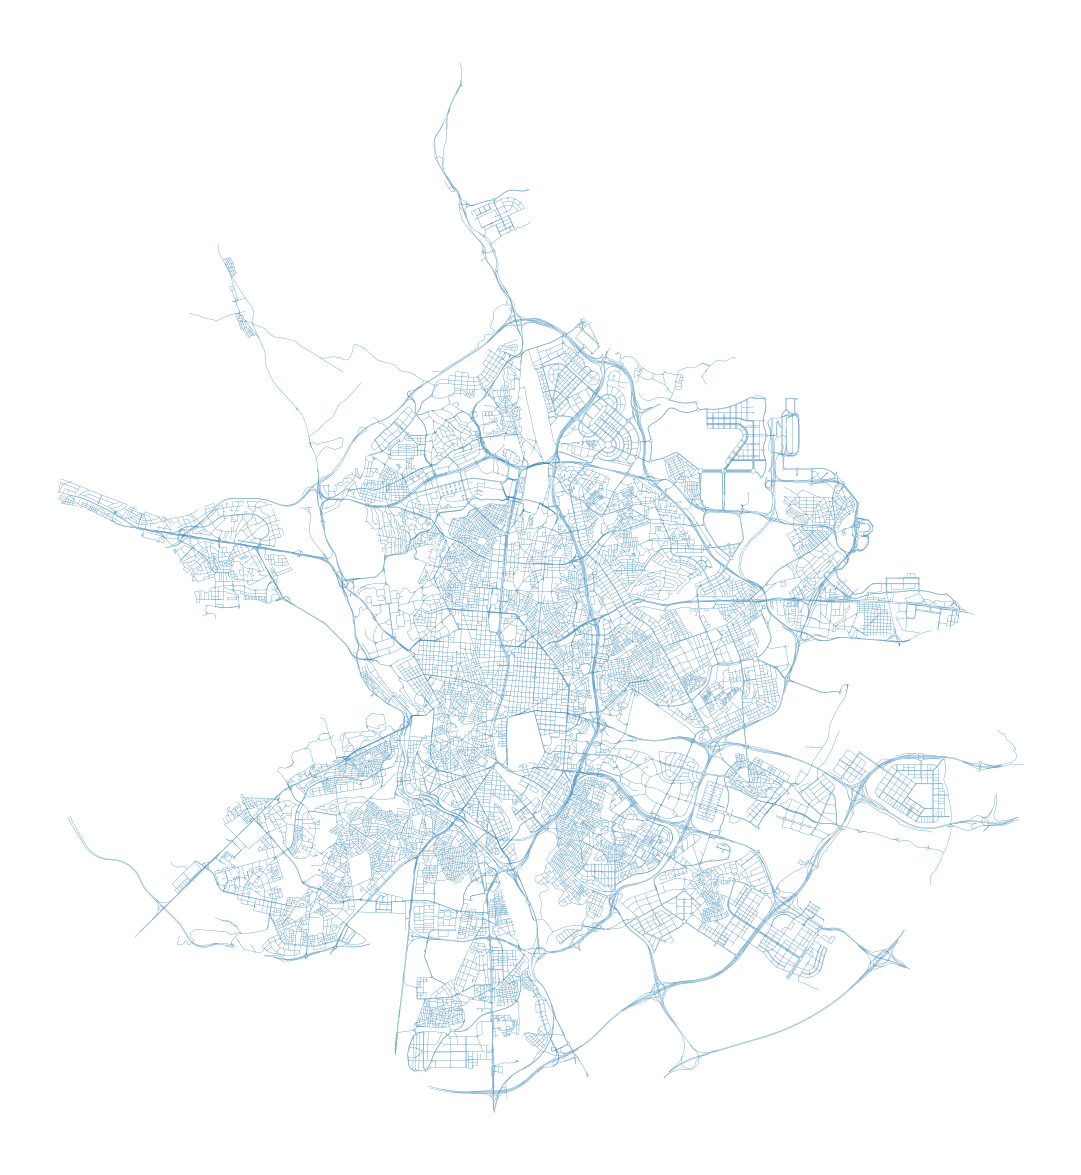

In [11]:
f, ax = plt.subplots(figsize=(15, 15))
edges.plot(ax=ax, linewidth=0.2)
ax.set_axis_off()
plt.show()

In [12]:
primal = momepy.gdf_to_nx(edges, approach='primal')

### Closeness centrality

Closeness centrality could be simplified as the average distance to every other node from each node. As such, it can be measured on the whole network (Global Closeness Centrality) or within a certain limit only (Local Closeness Centrality).

#### Local closeness
To measure local `closeness_centrality` we need to specify a radius (how far we should go from each node). We can use topological distance (e.g. 5 steps, then radius=5) or metric distance (e.g. 400 metres) - then radius=400 and distance=length of each segment saved as a parameter of each edge. By default, momepy saves length as `mm_len`.

The weight parameter is used for centrality calculation. Again, we can use metric weight (using the same attribute as above) or no weight (weight=None) at all. Or any other attribute we wish.

In [13]:
primal = momepy.closeness_centrality(primal, radius=400, name='closeness400', distance='mm_len', weight='mm_len')

  0%|          | 0/30979 [00:00<?, ?it/s]

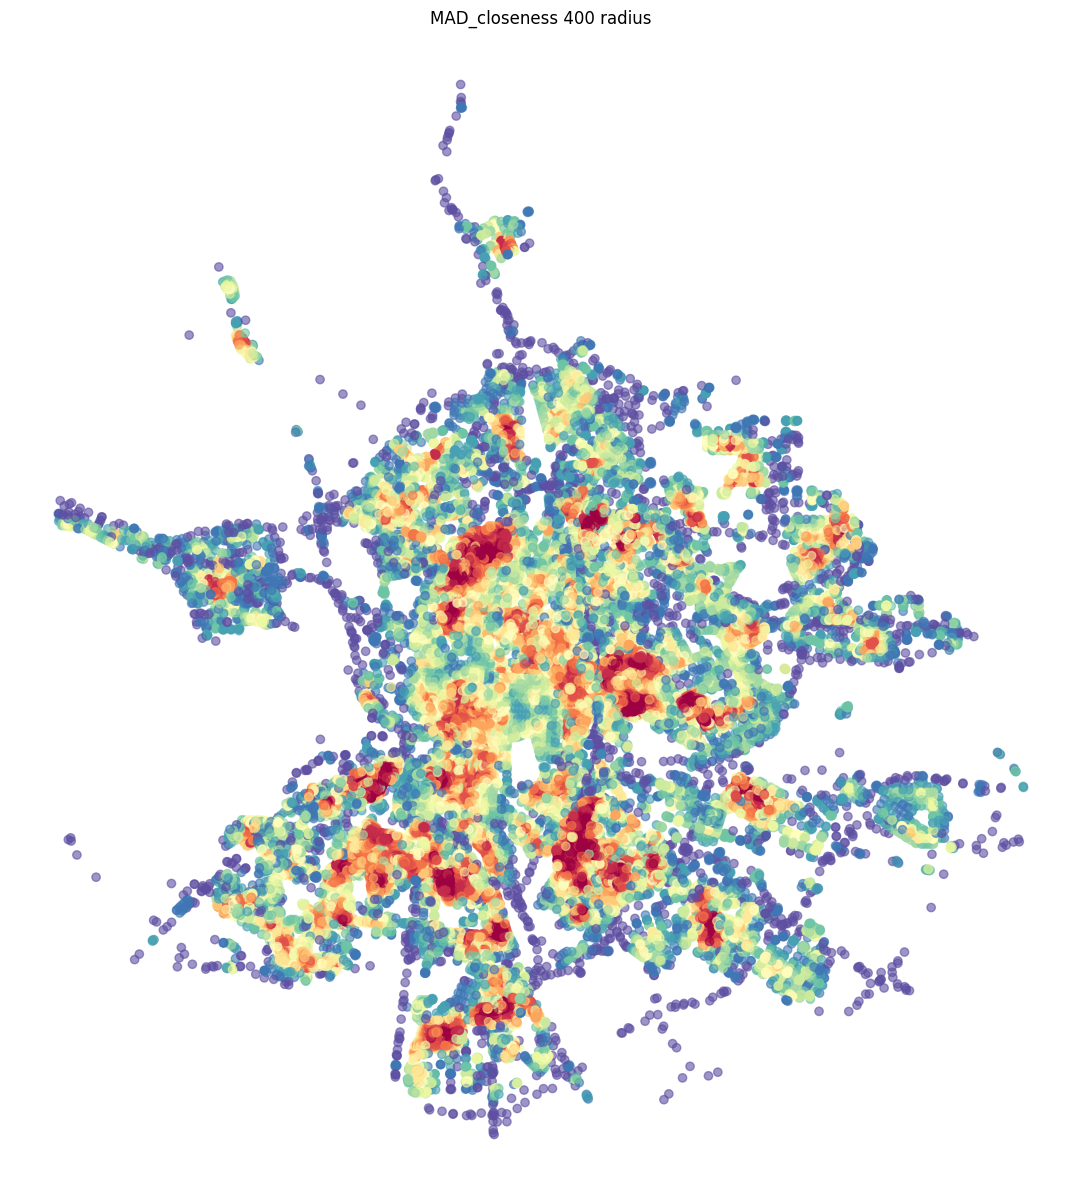

In [15]:
nodes = momepy.nx_to_gdf(primal, lines=False)
f, ax = plt.subplots(figsize=(15, 15))
nodes.plot(ax=ax, column='closeness400', cmap='Spectral_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('MAD_closeness 400 radius')
plt.show()